# 4章 オブジェクト指向プログラミングと関数型プログラミング

## 4.1 オブジェクト指向プログラミング

### 4.1.1 クラス、メソッド、属性

**クラス**：オブジェクトを定義するもの。クラスから作成された「もの」をクラスの**インスタンス**という。  
**メソッド**：クラスのオブジェクトに対してできる動作等を表す。オブジェクトの振る舞いを定義し、その属性を変更することもある。  
**属性**：クラスの性質を表す変数であり、オブジェクトごとに異なるデータを属性として記憶できる。  

例）
**住民クラス**：ある自治体に住む住民

**メソッド**：  
- 他の自治体からの転入（クラスの追加）
- 他の自治体への転出（クラスの削除）
- その自治体に生まれた場合は出生（クラスの追加）
- 市民税の算定（属性値の取得、別の属性値の変更）

**属性**
- 氏名
- 性別
- 生年月日
- 住所
- etc...

In [1]:
import pandas as pd

my_dict = {"column_1": [1, 2], "column_2": ["a", "b"]}

df = pd.DataFrame(data=my_dict)  # DataFrame型の新しいオブジェクトが初期化され、そのDataFrameの属性を設定するためのデータ(data)が渡される

# DataFrameオブジェクトの属性(columns, shape)にアクセスする
print(f"{df.columns=}")
print(f"{df.shape=}")

df.columns=Index(['column_1', 'column_2'], dtype='object')
df.shape=(2, 2)


In [2]:
# 別のメソッドを呼び出し(ファイル書き出しなので基本コメントアウト)
# df.to_csv("csv_file", index=False)

In [3]:
from sklearn.linear_model import LogisticRegression


clf = LogisticRegression()
# clf.fit(X_train, y_train)  # 実際に回すわけではないので、コメントアウト

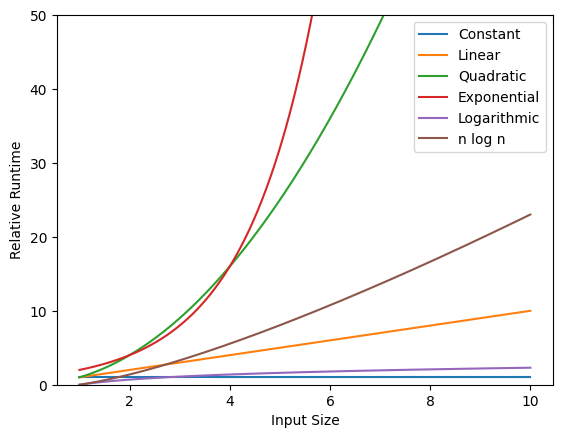

In [4]:
import matplotlib.pyplot as plt
import numpy as np


n = np.linspace(1, 10, 1000)
line_names = [
    "Constant",
    "Linear",
    "Quadratic",
    "Exponential",
    "Logarithmic",
    "n log n",
]
big_o = [np.ones(n.shape), n, n**2, 2**n, np.log(n), n * (np.log(n))]

fig, ax = plt.subplots()
fig.set_facecolor("white")

ax.set_ylim(0, 50)
for i in range(len(big_o)):
    ax.plot(n, big_o[i], label=line_names[i])
ax.set_ylabel("Relative Runtime")
ax.set_xlabel("Input Size")
ax.legend()

# fig.savefig(save_path, bbox_inches="tight")  # 画像保存はコメントアウト

### 4.1.2 クラスの定義

In [5]:
class RepeatText:
    def __init__(self, n_repeats):
        self.n_repeats = n_repeats


repeat_twice = RepeatText(2)

print(f"{repeat_twice.n_repeats=}")  # Output: 2

repeat_twice.n_repeats=2


In [6]:
# 別のメソッドを定義
class RepeatText:
    def __init__(self, n_repeats):
        self.n_repeats = n_repeats

    def multiply_text(self, some_text):
        print(f"{(some_text + ' ') * self.n_repeats}")


repeat_twice = RepeatText(2)
repeat_twice.multiply_text("Hello")  # Output: Hello Hello

Hello Hello 


In [7]:
class Goal5Data():
    def __init__(self, name, population, women_in_parliament):
        self.name = name
        self.population = population
        self.women_in_parliament = women_in_parliament  # その国の統治機関における女性の議席占有率

    def print_summary(self):
        null_women_in_paliament = len(self.women_in_parliament) - \
            np.count_nonzero(self.women_in_parliament)
        print(f"There are {len(self.women_in_parliament)} data point for \
Indicator 5.5.1, 'Proportion of seats held by women in national' \
parliaments'.")
        print(f"{null_women_in_paliament} are nulls.")

In [8]:
usa = Goal5Data(
    name="USA",
    population=336262544,
    women_in_parliament=[
        13.33,
        14.02,
        14.02,
        14.25,
        14.25,
        14.94,
        15.17,
        16.32,
        16.78,
        17.01,
        16.78,
        16.78,
        16.82,
        17.78,
        18.29,
        19.35,
        19.35,
        19.08,
        19.49,
        23.56,
        23.43,
        27.25,
        27.71,
        29.43,
    ],
)

In [9]:
usa.print_summary()

There are 24 data point for Indicator 5.5.1, 'Proportion of seats held by women in national' parliaments'.
0 are nulls.


### 4.1.3 OOPの継承概念

#### 4.1.3.1  継承  
**継承**(inheritance)とは、あるクラスをベースにして別のクラスを作成して、そのクラスを「拡張」することを意味する。  
→ すでに書いたクラスと密接に関連する新しいクラスが必要な場合、ちょっとした変更を加えるためだけに、全体を重複させる必要がない。

継承を使っている場合、クラスの定義は次のようになる。
```python
class NewClass(originalClass):
    ...
```

*NewClass*クラスは、*OriginalClass*のすべての属性とメソッドを使用できるが、変更したいものは「**オーバーライド**」できる。  
→ *OriginalClass*のことを**親クラス**、それを継承する*NewClass*のほうを**子クラス**と呼ぶ。

次のコードは、前節の*Goal5Data*クラスを継承し、時系列データを扱えるようにした新しいクラス*Goal5TimeSeries*の例である。

In [10]:
from scipy.stats import linregress


class Goal5TimeSeries(Goal5Data):
    def __init__(self, name, population, women_in_parliament, timestamps):
        super().__init__(name, population, women_in_parliament)
        self.timestamps = timestamps

    def fit_trendline(self):
        result = linregress(self.timestamps, self.women_in_parliament)
        # 回帰直線の傾き(slope)と決定係数(r_squared)を返す
        slope = round(result.slope, 3)
        r_squared = round(result.rvalue**2, 3)
        return slope, r_squared


In [11]:
india = Goal5TimeSeries(
    name="India",
    population=1417242151,
    women_in_parliament=[
        9.02,
        9.01,
        8.84,
        8.84,
        8.84,
        8.29,
        8.26,
        8.26,
        9.06,
        9.06,
        10.83,
        10.83,
        11.01,
        11.01,
        11.38,
        11.97,
        11.97,
        11.81,
        11.81,
        12.6,
        14.36,
        14.44,
        14.94,
        15.13,
    ],
    timestamps=[
        2000,
        2001,
        2002,
        2003,
        2004,
        2005,
        2006,
        2007,
        2008,
        2009,
        2010,
        2011,
        2012,
        2013,
        2014,
        2015,
        2016,
        2017,
        2018,
        2019,
        2020,
        2021,
        2022,
        2023,
    ],
)

In [12]:
india.print_summary()

There are 24 data point for Indicator 5.5.1, 'Proportion of seats held by women in national' parliaments'.
0 are nulls.


In [13]:
india.fit_trendline()

(np.float64(0.292), np.float64(0.869))

#### 4.1.3.2 カプセル化

#### 4.1.3.3 抽象化

#### 4.1.3.4 ポリモーフィズム

```python
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
```

## 4.2 関数型プログラミング

### 4.2.1 ラムダ関数とmap()

**ラムダ関数**とは、名前を持たない小さな関数のこと。一度きりの作業を素早く行うために使える。別名**無名関数**(もしくは匿名関数)と呼ばれる。  
ラムダ関数は次のような構文を持つ。  
```python
lambda <引数>:<式>
```

In [14]:
usa_govt_percentages = [
    13.33,
    14.02,
    14.02,
    14.25,
    14.25,
    14.94,
    15.17,
    16.32,
    16.78,
    17.01,
    16.78,
    16.78,
    16.82,
    17.78,
    18.29,
    19.35,
    19.35,
    19.08,
    19.49,
    23.56,
    23.43,
    27.25,
    27.71,
    29.43,
]

In [15]:
usa_govt_percentages = list(map(lambda x: x / 100, usa_govt_percentages))

print(usa_govt_percentages)

[0.1333, 0.1402, 0.1402, 0.1425, 0.1425, 0.1494, 0.1517, 0.1632, 0.1678, 0.17010000000000003, 0.1678, 0.1678, 0.16820000000000002, 0.1778, 0.18289999999999998, 0.1935, 0.1935, 0.19079999999999997, 0.1949, 0.23559999999999998, 0.2343, 0.2725, 0.2771, 0.2943]


### 4.2.2 関数をDataFrameに適用

```python
df["USA_processed"] = df["United States of America"].apply(lambda x:
                                                            "Monstly male"
                                                            if x < 50
                                                            else "Monstly female")
```

apply関数の引数に関数名をつけることで、列のすべての行に対してこの関数を呼び出すことができる。
```python
df["USA_processed"] = df["United States of America"].apply(binary_labels)
```
この方が、関数を再利用できる。

## 4.3 どのパラダイムを使うべきか？

個人開発であれば、オブジェクト指向プログラミングであるべきか、もしくは関数型プログラミングであるべきかは重要ではない。
→ きちんと機能するモジュール化されたスクリプトを書けばよい。

大規模なプロジェクトにおいては
* 一群の「もの」があって、それに関して何かをする必要があるのならば、オブジェクト指向プログラミングの方が扱いやすい可能性が高い。  
    → 振る舞いは似ているが属性やデータが異なるインスタンスの集まりと捉えることができる。クラスのインスタンスを数多く作る必要があるかどうかが重要。インスタンスを一つしかない場合は新しいクラスを書く価値はない。
* 固定されたデータに対して新しいことをしたいのであれば、関数型プログラミングがよい選択かもしれない。もしくは大量のデータを持っていて、それに対する操作を並列化したい場合にも向いている？

## 4.4 まとめ